<a href="https://colab.research.google.com/github/Chinh-tran204/AI_CODING/blob/main/cifar10_EXC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# khai báo các thư viện cần thiết ch việc chạy 
from keras.datasets import cifar10
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data cần thiết để chạy
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

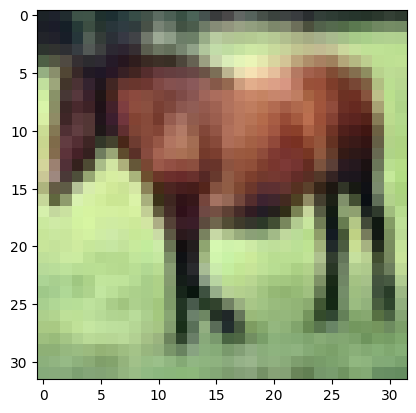

So nay la: [1]


In [ ]:
import matplotlib.pyplot as plt
hinh= x_train[7]                      #Lấy hình ở vị trí thứ 7
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show()
print("So nay la:",y_train[5])

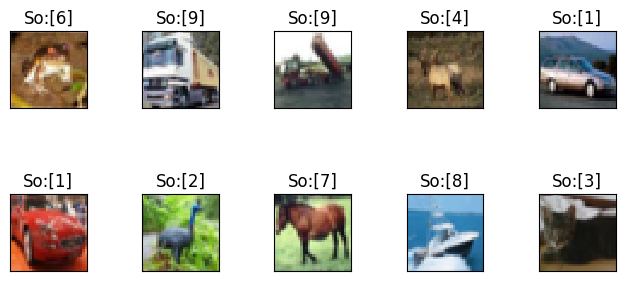

In [ ]:
# test thử data
for i in range(10):
  plt.subplot(3,5,i+1)                                              # 2 hàng 5 cột 
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("So:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(512, input_shape = (32*32*3,), activation = 'relu'))
model.add(Dense(10,activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical #Lệnh chuyển qua 

y_train = to_categorical(y_train, 10) #chuyển sang 10 kênh
y_test = to_categorical(y_test, 10)

In [ ]:
from keras.models import load_model
# Tải mô hình từ file đã lưu
model = load_model('./model_cifar10.h5')

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 10, batch_size= 128) # Mỗi lần học chỉ 128 dữ liệu, không học hết 60000 dữ liệu , học tổng cộng 10 lầnlần
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test_accuracy:',test_acc)
print('test_loss:',test_loss)
model.save('model_cifar10.h5')

Epoch 1/10
391/391 [==============================] - 12s 28ms/step - loss: 0.5079 - accuracy: 0.8249
Epoch 2/10
391/391 [==============================] - 11s 27ms/step - loss: 0.4935 - accuracy: 0.8273
Epoch 3/10
391/391 [==============================] - 11s 27ms/step - loss: 0.4976 - accuracy: 0.8248
Epoch 4/10
391/391 [==============================] - 11s 27ms/step - loss: 0.4900 - accuracy: 0.8280
Epoch 5/10
391/391 [==============================] - 11s 27ms/step - loss: 0.4896 - accuracy: 0.8293
Epoch 6/10
391/391 [==============================] - 9s 24ms/step - loss: 0.4914 - accuracy: 0.8282
Epoch 7/10
391/391 [==============================] - 11s 27ms/step - loss: 0.4985 - accuracy: 0.8264
Epoch 8/10
391/391 [==============================] - 11s 27ms/step - loss: 0.4901 - accuracy: 0.8304
Epoch 9/10
391/391 [==============================] - 11s 27ms/step - loss: 0.4992 - accuracy: 0.8254
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 5.6971 -

In [ ]:
model.save('model_cifar10.h5')

1/1 [==============================] - 0s 78ms/step


array([0])

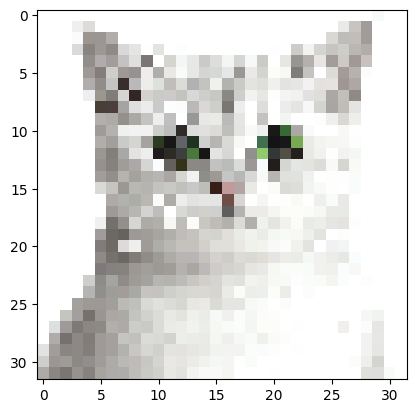

In [ ]:
from keras.utils import load_img
import matplotlib.pyplot as plt

img = load_img('Kit-Cat.png',target_size=(32,32))
plt.imshow(img)

import numpy as np
from keras.utils.image_utils import img_to_array
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis=-1)